**22004876  Vinnie Tiang Wen Ying** -- *Machine Learning LabWork1*

# 1) Data Analysis

**1a) Import All Libraries Needed**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Import libraries for model development
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split

# Import libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries needed for evaluation purpose
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

# Import libraries for standardization/normalization of the features of dataset 
from sklearn.preprocessing import StandardScaler

# Import library for forming table to visualize results
from tabulate import tabulate

**1b) Load the given dataset of house prices**

In [2]:
# load data from CSV file into a pandas DataFrame
houseData = pd.DataFrame(pd.read_csv("House Pricing.csv"))

In [3]:
# Show how the dataset looks like
houseData

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


**1c) Data Inspection : Explore the dataset to gain insights into the data**

In [4]:
# check the shape (number of rows and columns) of dataset
print("Shape of the DataFrame:",houseData.shape)

Shape of the DataFrame: (545, 13)


In [5]:
# Check the head (first 5 rows) of the dataset
houseData.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
# Check the tail (last 5 rows) of the dataset
houseData.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [7]:
# Get statistics of dataset and round off to 3 decimal places
houseData.describe().round(3)

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000,545.000,545.000,545.000,545.000
mean,4.766729e+06,5150.541,2.965,1.286,1.806,0.694
std,1.870440e+06,2170.141,0.738,0.502,0.867,0.862
min,1.750000e+06,1650.000,1.000,1.000,1.000,0.000
25%,3.430000e+06,3600.000,2.000,1.000,1.000,0.000
50%,4.340000e+06,4600.000,3.000,1.000,2.000,0.000
75%,5.740000e+06,6360.000,3.000,2.000,2.000,1.000
max,1.330000e+07,16200.000,6.000,4.000,4.000,3.000


**1d) Data Cleaning**

**Check Missing Values in dataset**

In [8]:
# Check count of dataset
# Check count of non-null value for each feature
# Check type of variable for each feature 
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
# Check count of null value
houseData.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

*There are no null values in the dataset, hence it is clean.*

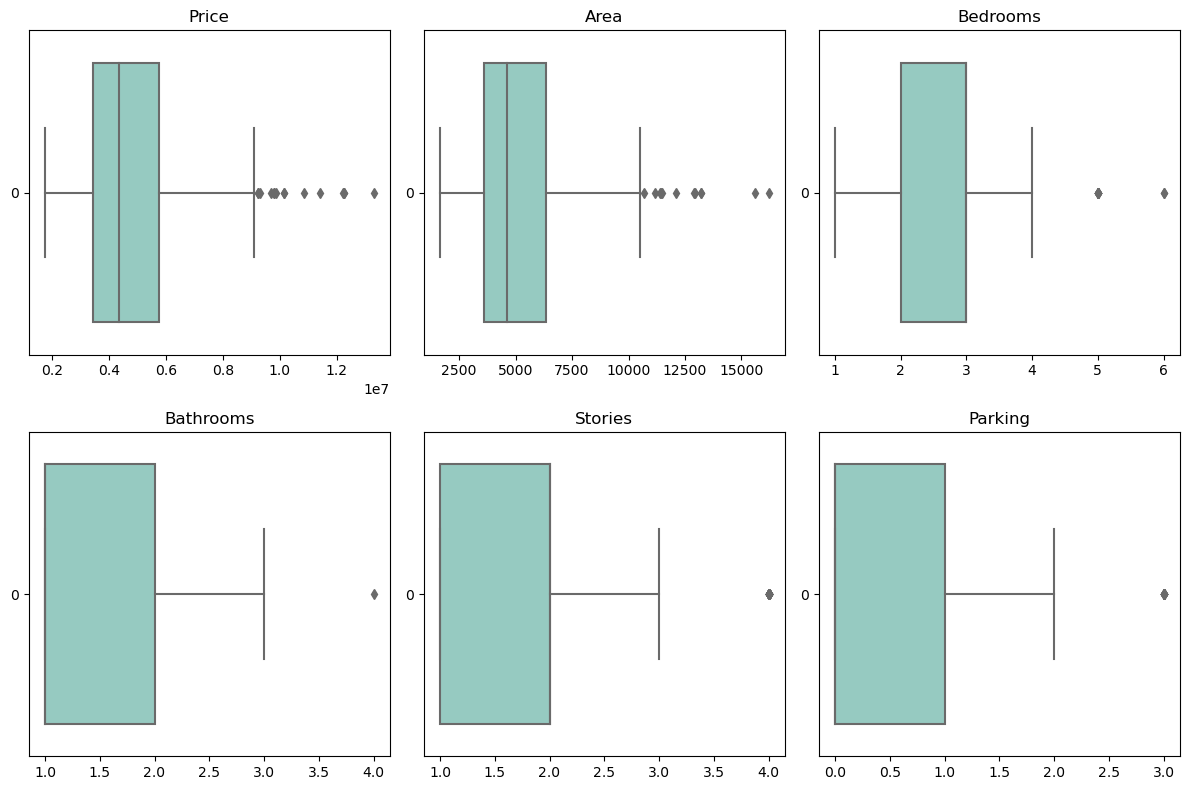

In [10]:
# Outlier Analysis
sns.set_palette("Set3")
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
sns.boxplot(houseData['price'], orient='h', ax=axs[0, 0]).set(title='Price')
sns.boxplot(houseData['area'], orient='h', ax=axs[0, 1]).set(title='Area')
sns.boxplot(houseData['bedrooms'], orient='h', ax=axs[0, 2]).set(title='Bedrooms')
sns.boxplot(houseData['bathrooms'], orient='h', ax=axs[1, 0]).set(title='Bathrooms')
sns.boxplot(houseData['stories'], orient='h', ax=axs[1, 1]).set(title='Stories')
sns.boxplot(houseData['parking'], orient='h', ax=axs[1, 2]).set(title='Parking')

plt.tight_layout()


*Based on the outlier analysis, The variables 'price' and 'area' contains significant outliers.*

*Although the variables 'price' and 'area' has considerable outliers, the overall performance after doing the outlier treatment for them will be lower than ignoring the outliers, so the outlier treatment is not going to be carried out here.*

<Axes: xlabel='area', ylabel='price'>

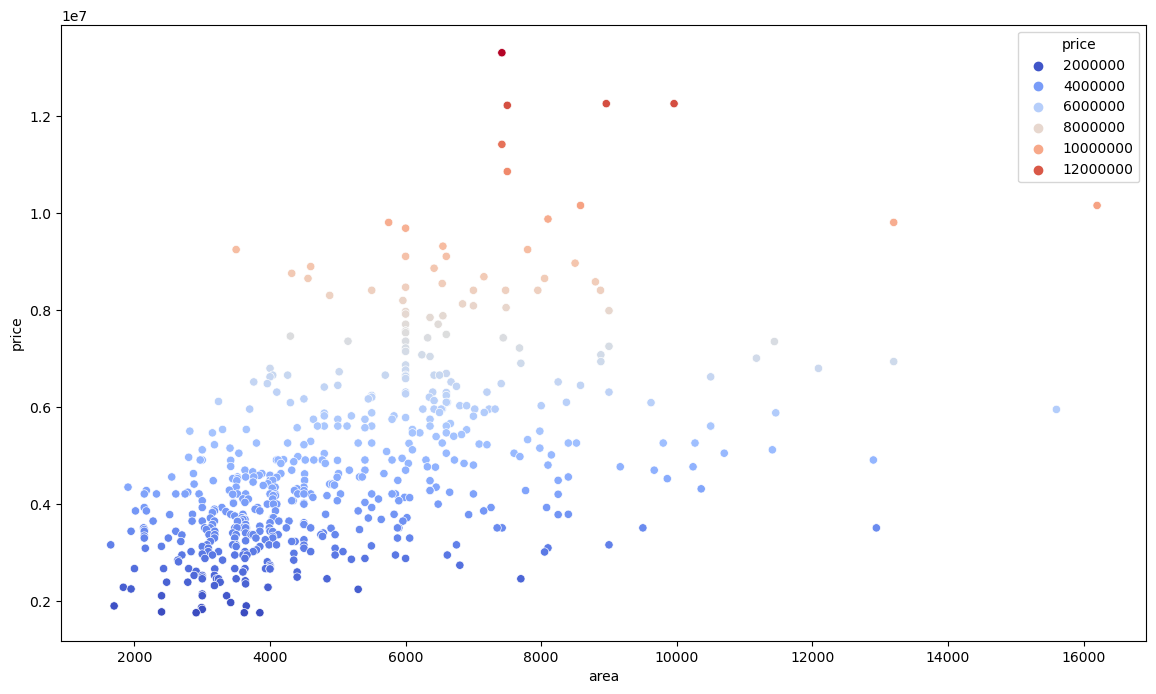

In [11]:
# Scatter plot of price against area to visualize their relationship in the dataset.
plt.figure(figsize=(14,8))
sns.scatterplot(x="area",y="price",data=houseData,hue="price",palette="coolwarm")

**1e) Visualize Variables**

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

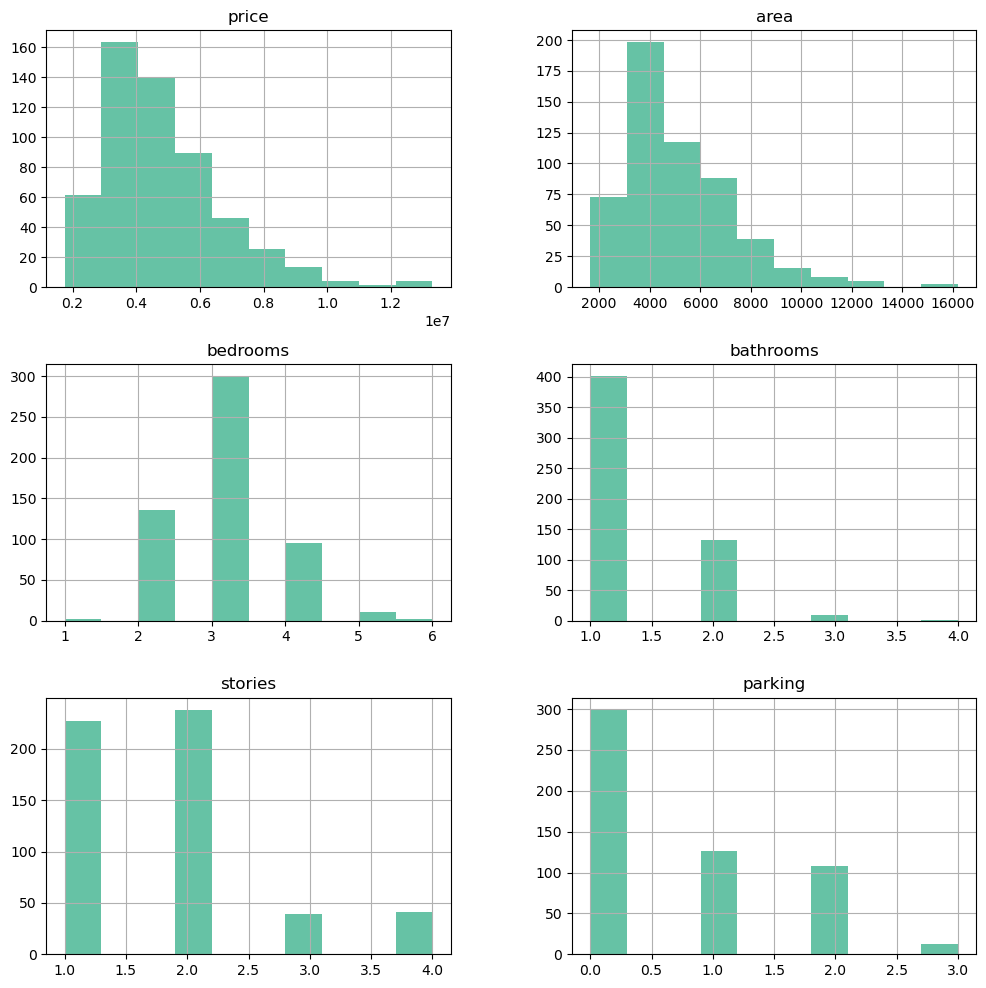

In [12]:
# Show the distribution of numerical features
sns.set_palette("Set2")
houseData.hist(figsize=(12,12))

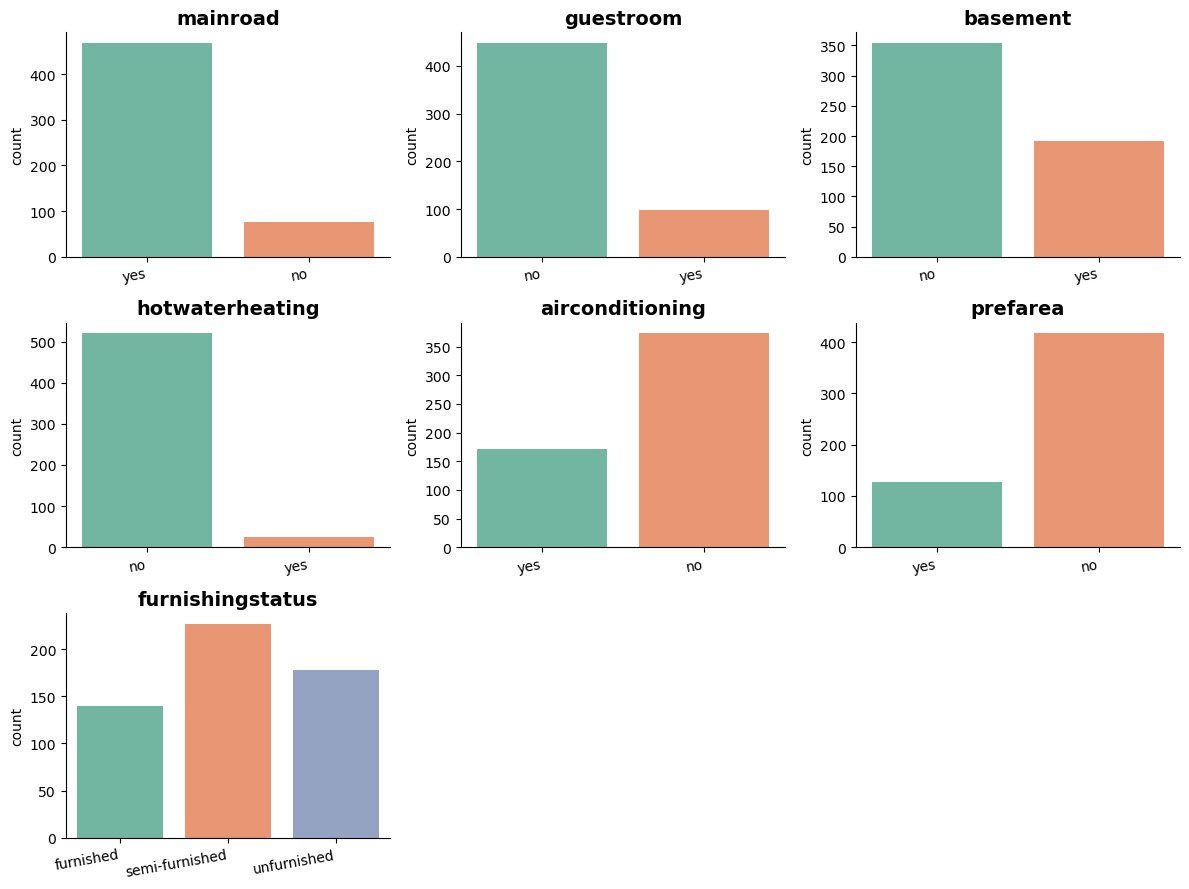

In [13]:
# Show the distribution of categorical values
cat_vars = houseData.select_dtypes(include=['object']).columns.tolist()
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(12, num_rows*3))

for i, col in enumerate(cat_vars):
    row_idx = i // 3 
    col_idx = i % 3   
    ax = axes[row_idx, col_idx] 
    
    sns.countplot(data=houseData, x=col, ax=ax, palette='Set2')
    ax.set_title(col, fontdict={'fontsize': 14, 'fontweight': 'bold'})
    ax.set_xlabel('')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.setp(ax.get_xticklabels(), rotation=10, ha="right")

for j in range(num_cols, num_rows*3):
    axes.flat[j].axis("off")

plt.tight_layout()
plt.show()

- Exploratory Data Analytics (EDA)

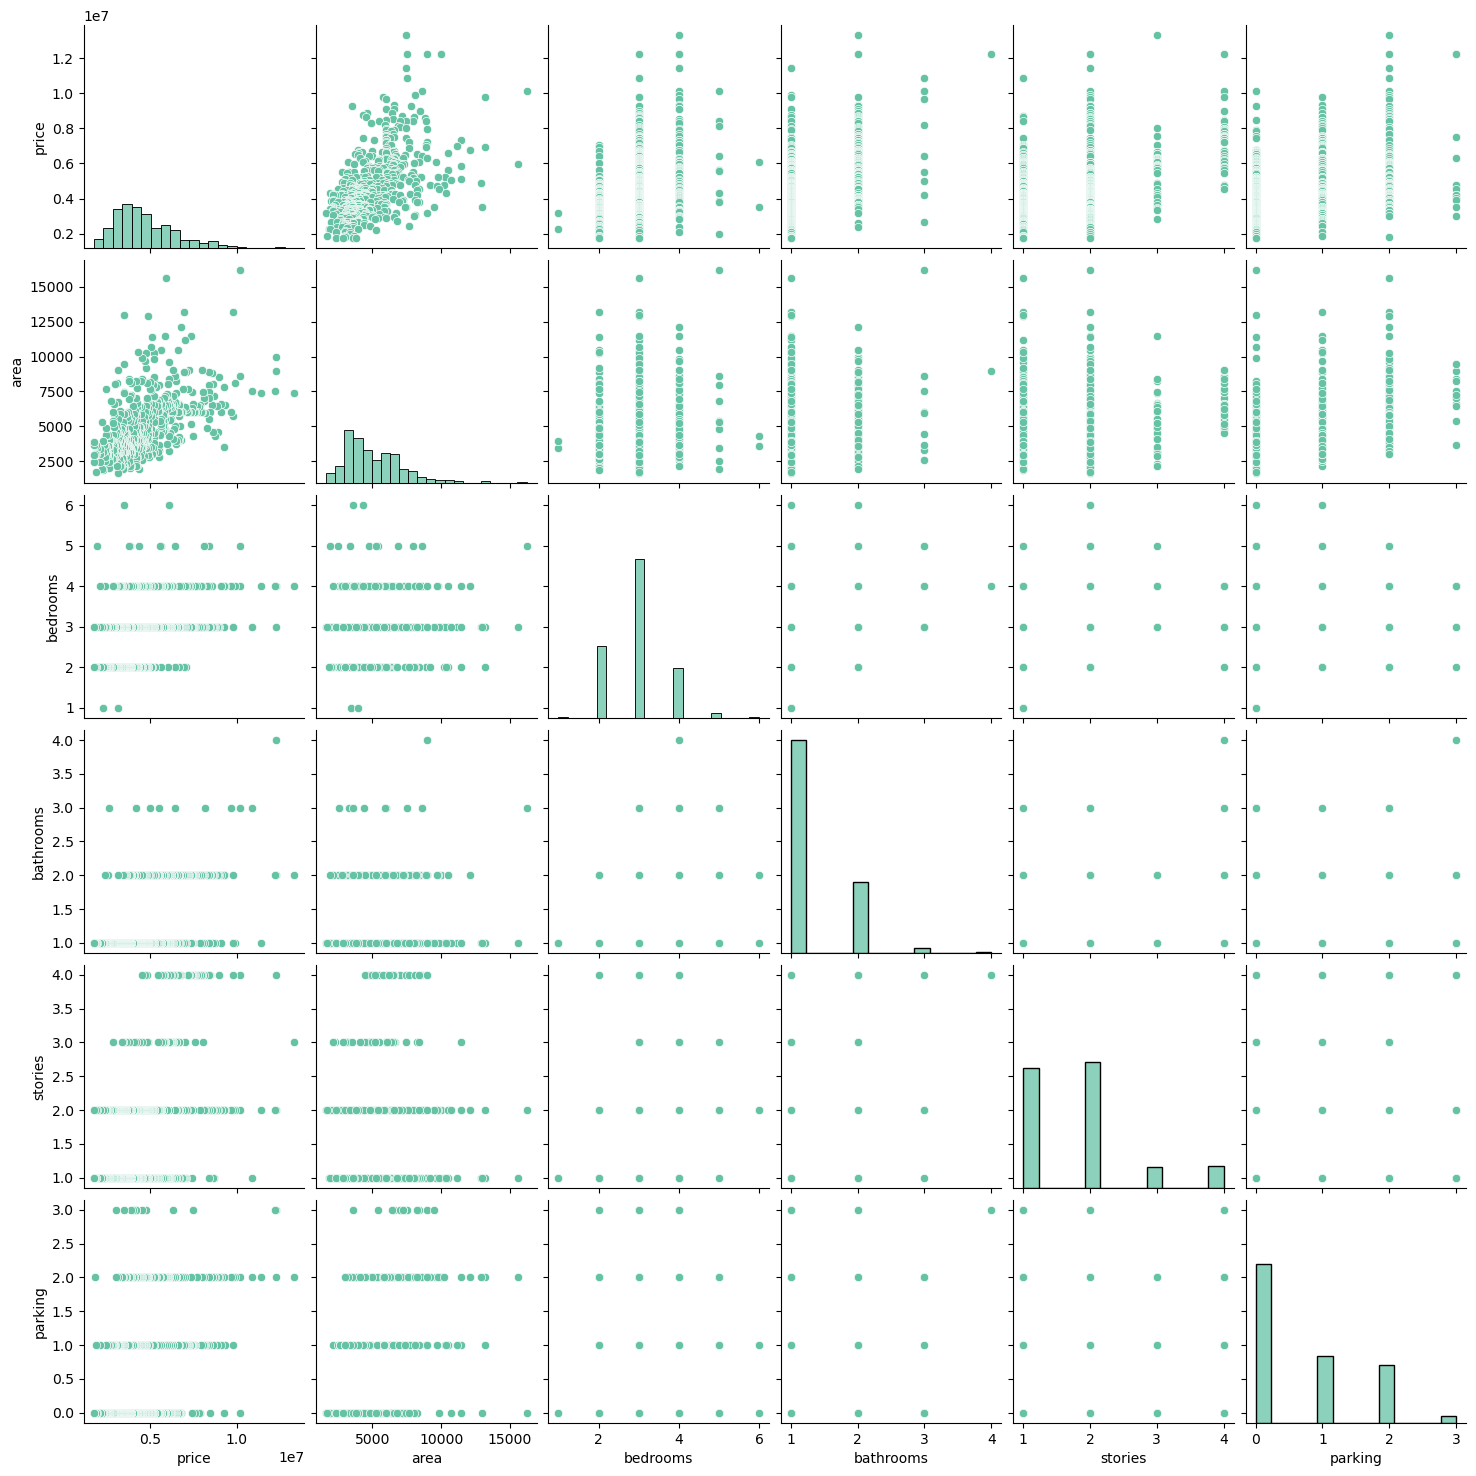

In [14]:
# Visualize numeric variables
sns.pairplot(houseData)
plt.show()

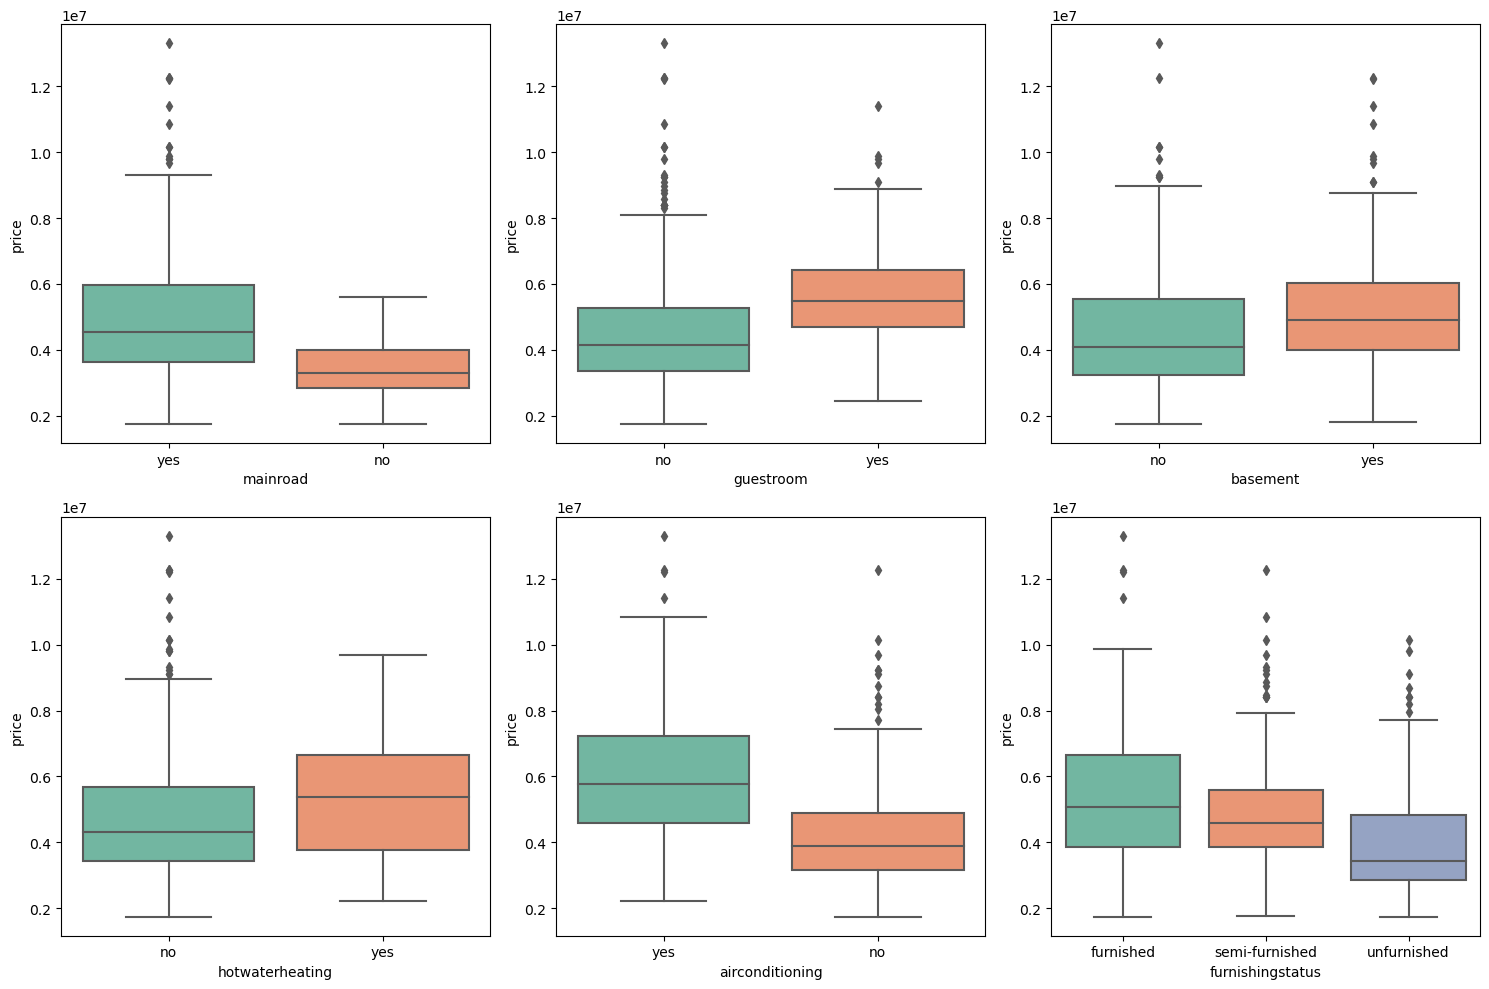

In [15]:
# Visualize categorical variables by using boxplot

# Create a list of all categorical variables
cat_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, var in enumerate(cat_vars):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.boxplot(x=var, y='price', data=houseData, ax=ax)

plt.tight_layout()
plt.show()

# 2) Data Preprocessing 

**2a) Handling Missing Values -- The dataset is cleaned as there are no null values in the dataset.**

**2b) Handling Categorical Variables**
- **Categorical Data Encoding**

In [16]:
# Select categorical variables to use in the regression model
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# replace 'yes' and 'no' strings with binary values (1 and 0 respectively)
houseData[varlist] = houseData[varlist].replace({'yes': 1, 'no': 0})

In [17]:
# Show the head (first 5 rows) of the processed data
houseData.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


- **Handling the dummy variable 'furnishingstatus'**

In [18]:
# Count the occurrences of each unique value in the 'furnishingstatus' column to check its distribution as a categorical variable.
houseData.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [19]:
# Store the dummy variable for 'furnishingstatus' in new variable "dummy"
dummy = pd.get_dummies(houseData.furnishingstatus)

# Show how dataset 'dummy' looks like
dummy.head()


,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [20]:
# Drop the column 'furnished', which is the first column from dummy 
# 00 (furnished)
# 01 (unfurnished)
# 10 (semi-furnished)
dummy = pd.get_dummies(houseData.furnishingstatus, drop_first = True)

# Add the results into the original houseData dataframe
houseData = pd.concat([houseData, dummy], axis = 1)

# Check the head (first 5 rows) of processed data
houseData.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [21]:
# Drop column 'furnishingstatus' since dummies had been created for it
houseData.drop(['furnishingstatus'], axis = 1, inplace = True)
# Check the head (first 5 rows) of houseData
houseData.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


**2c) Visualization of the correlations between all variables:**

In [22]:
# calculate the correlation matrix for the variables in the 'houseData' dataframe in table form
houseData.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.053179,-0.094086


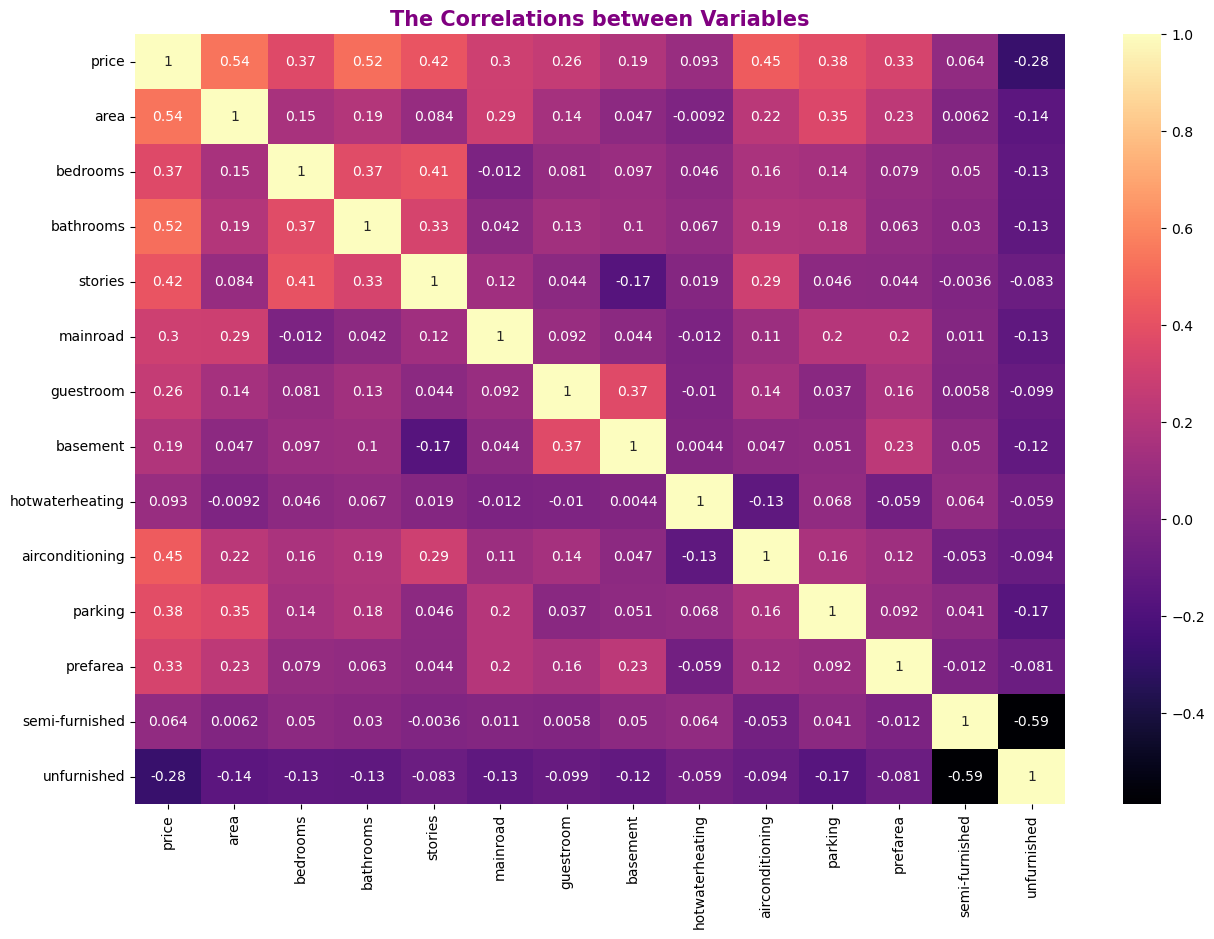

In [23]:
# Show the correlations of all variables to check which variables are highly correlated in heatmap
plt.figure(figsize=(15,10))
sns.heatmap(houseData.corr(),cmap="magma", annot=True)
plt.title("The Correlations between Variables", size=15, color='purple',fontweight='bold')
plt.show()

*Based on the visualization of the correlations between the variables, it is observed that features 'hotwaterheating' and 'semi-furnished' are less correlated (<0.1).*

**2d) Identifying the Features and Target Variables in the dataset.**

In [24]:
# Removing features 'hotwaterheating' and 'semi-furnished' with correlation lower than 0.1 

X = houseData.drop(['price','hotwaterheating','semi-furnished'], axis=1)
y = houseData['price']

**2e) Scaling the Numerical Features**

In [25]:
# Drop categorical columns before scaling
X_numerical = X.drop(['mainroad', 'guestroom', 'basement', 'airconditioning', 'prefarea', 'unfurnished'], axis=1)

# Standardize the numerical variables using the StandardScaler
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Create a new DataFrame with the scaled numerical data
X_numerical_scaled_df = pd.DataFrame(X_numerical_scaled, columns=X_numerical.columns)

# Concatenate the scaled numerical data with the categorical columns
X_scaled_df = pd.concat([X_numerical_scaled_df, X[['mainroad', 'guestroom', 'basement', 'airconditioning', 'prefarea', 'unfurnished']]], axis=1)

# Show head of scaled data
X_scaled_df.head()

,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,airconditioning,prefarea,unfurnished
0,1.046726,1.403419,1.421812,1.378217,1.517692,1,0,0,1,1,0
1,1.757010,1.403419,5.405809,2.532024,2.679409,1,0,0,1,0,0
2,2.218232,0.047278,1.421812,0.224410,1.517692,1,0,1,0,1,0
3,1.083624,1.403419,1.421812,0.224410,2.679409,1,0,1,1,1,0
4,1.046726,1.403419,-0.570187,0.224410,1.517692,1,1,1,1,0,0


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,unfurnished
count,5.450000e+02,5.450000e+02,5.450000e+02,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,-1.564498e-16,-1.825247e-16,-2.607496e-17,-1.303748e-16,0.000000,0.858716,0.177982,0.350459,0.315596,0.234862,0.326606
std,1.000919e+00,1.000919e+00,1.000919e+00,1.000919e+00,1.000919,0.348635,0.382849,0.477552,0.465180,0.424302,0.469402
min,-1.614530e+00,-2.665004e+00,-5.701867e-01,-9.293967e-01,-0.805741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.151451e-01,-1.308863e+00,-5.701867e-01,-9.293967e-01,-0.805741,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.539222e-01,4.727831e-02,-5.701867e-01,2.244101e-01,-0.805741,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.578300e-01,4.727831e-02,1.421812e+00,2.244101e-01,0.355976,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,5.096263e+00,4.115701e+00,5.405809e+00,2.532024e+00,2.679409,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


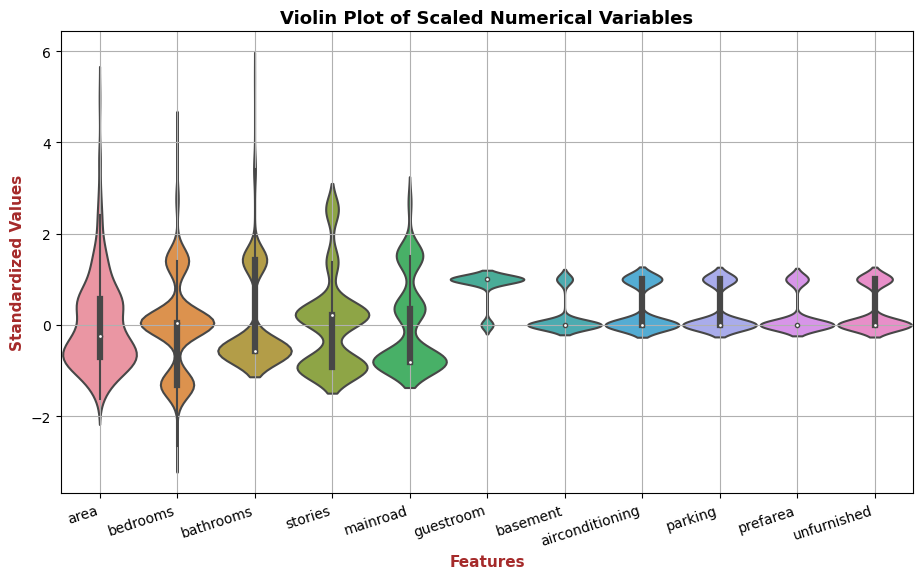

In [26]:
# Set column names of X_scaled_df to column names of X
X_scaled_df.columns = X.columns

# Show the summary statistics of the scaled data
display(X_scaled_df.describe())

# Visualizing the scaled data with a violin plot
fig, ax = plt.subplots(figsize=(11, 6))
sns.set_palette('husl')

sns.violinplot(orient='p', data=X_scaled_df, ax=ax, width=0.95, scale='width', zorder=1)

ax.set_title('Violin Plot of Scaled Numerical Variables', fontsize=13,fontweight='bold')
ax.set_xlabel('Features', fontsize=11,color='brown', fontweight='bold')
ax.set_ylabel('Standardized Values', fontsize=11,color='brown', fontweight='bold')
ax.set_xticklabels(X.columns, rotation=18, ha='right')

# Add gridlines to both x and y axes
ax.grid(axis='y', zorder=-1)
ax.grid(axis='x', zorder=-1)

plt.show()


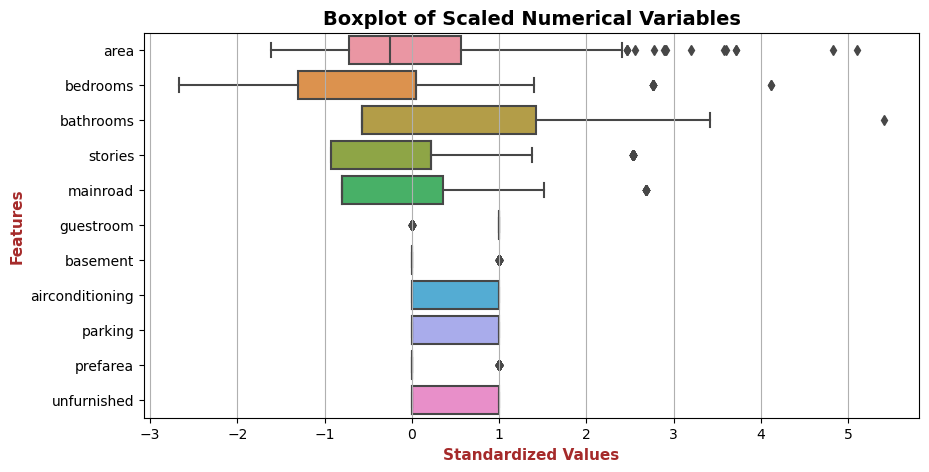

In [27]:
# Visualizing the scaled data with a boxplot
fig, ax = plt.subplots(figsize=(10, 5))
sns.set_palette('Set2')
sns.boxplot(data=X_scaled_df, orient='h', ax=ax, zorder=1)
ax.set_title('Boxplot of Scaled Numerical Variables', fontsize=14, fontweight='bold')
ax.set_xlabel('Standardized Values',color='brown', fontsize=11, fontweight='bold')
ax.set_ylabel('Features', fontsize=11,color='brown', fontweight='bold')
ax.grid(axis='x', zorder=0)
plt.show()

**2f) Split dataset into training and testing sets**

In [28]:
# This is specified so that the train and test data set always have the same rows
np.random.seed(0)

# Spliting the dataset into training and testing 
df_train, df_test = train_test_split(houseData, train_size = 0.8, test_size = 0.2, random_state = 50)

In [29]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

# Show the first five rows of the training dataset in order to check if the data has been split correctly.
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
271,4340000,-1.477060,2.899407,-0.581764,0.250091,0,0,1,0,0,-0.808769,0,1,0
355,3773000,1.370165,0.065009,-0.581764,-0.922380,1,0,0,0,0,1.542053,0,0,0
151,5565000,-0.357466,1.482208,-0.581764,0.250091,1,0,0,0,1,1.542053,1,1,0
29,8400000,0.136143,1.482208,1.431325,0.250091,1,0,1,0,1,0.366642,1,1,0
534,2100000,-0.985695,1.482208,-0.581764,0.250091,1,0,0,0,0,-0.808769,0,0,1


In [30]:
# Show the summary of the descriptive statistics of the numerical variables in the df_train DataFrame
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,4.360000e+02,4.360000e+02,4.360000e+02,4.360000e+02,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,4.360000e+02,436.000000,436.000000,436.000000
mean,4.780501e+06,-1.140780e-16,-8.555847e-17,9.778111e-17,0.000000,0.862385,0.162844,0.337156,0.052752,0.307339,2.037106e-17,0.245413,0.433486,0.307339
std,1.876718e+06,1.001149e+00,1.001149e+00,1.001149e+00,1.001149,0.344891,0.369647,0.473282,0.223795,0.461921,1.001149e+00,0.430826,0.496125,0.461921
min,1.750000e+06,-1.569051e+00,-2.769388e+00,-5.817643e-01,-0.922380,0.000000,0.000000,0.000000,0.000000,0.000000,-8.087693e-01,0.000000,0.000000,0.000000
25%,3.465000e+06,-7.164542e-01,6.500912e-02,-5.817643e-01,-0.922380,1.000000,0.000000,0.000000,0.000000,0.000000,-8.087693e-01,0.000000,0.000000,0.000000
50%,4.340000e+06,-2.605392e-01,6.500912e-02,-5.817643e-01,0.250091,1.000000,0.000000,0.000000,0.000000,0.000000,-8.087693e-01,0.000000,0.000000,0.000000
75%,5.782000e+06,5.220551e-01,6.500912e-02,1.431325e+00,0.250091,1.000000,0.000000,1.000000,0.000000,1.000000,3.666421e-01,0.000000,1.000000,1.000000
max,1.330000e+07,4.937610e+00,2.899407e+00,3.444414e+00,2.595033,1.000000,1.000000,1.000000,1.000000,1.000000,2.717465e+00,1.000000,1.000000,1.000000


In [31]:
# Show the first five rows of the test set dataframe to know how the data looks like and how it differs from the training set.
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
333,3920000,-0.985695,0.065009,-0.581764,0.250091,1,0,0,0,0,-0.808769,0,1,0
37,7980000,1.706716,1.482208,1.431325,2.595033,1,0,0,0,1,1.542053,0,0,0
396,3500000,-0.698505,-1.352190,-0.581764,-0.922380,1,0,0,0,0,0.366642,0,1,0
494,2730000,0.719499,-1.352190,-0.581764,-0.922380,1,0,0,0,0,-0.808769,0,0,1
536,1960000,-0.797227,2.899407,-0.581764,0.250091,0,0,0,0,0,-0.808769,0,0,1


In [32]:
# Show the summary of the descriptive statistics of the numerical variables in the df_test DataFrame
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,1.090000e+02,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,4.711642e+06,-0.103358,0.078011,-0.027703,0.110255,0.844037,0.238532,0.403670,0.018349,0.348624,0.032351,0.192661,0.348624,0.403670
std,1.852662e+06,0.855030,1.212013,1.056439,1.078899,0.364496,0.428155,0.492899,0.134829,0.478736,1.062115,0.396210,0.478736,0.492899
min,1.750000e+06,-1.591488,-1.352190,-0.581764,-0.922380,0.000000,0.000000,0.000000,0.000000,0.000000,-0.808769,0.000000,0.000000,0.000000
25%,3.360000e+06,-0.761328,-1.352190,-0.581764,-0.922380,1.000000,0.000000,0.000000,0.000000,0.000000,-0.808769,0.000000,0.000000,0.000000
50%,4.375000e+06,-0.352979,0.065009,-0.581764,0.250091,1.000000,0.000000,0.000000,0.000000,0.000000,-0.808769,0.000000,0.000000,0.000000
75%,5.740000e+06,0.575903,0.065009,-0.581764,0.250091,1.000000,0.000000,1.000000,0.000000,1.000000,0.366642,0.000000,1.000000,1.000000
max,1.225000e+07,2.065704,4.316605,5.457503,2.595033,1.000000,1.000000,1.000000,1.000000,1.000000,2.717465,1.000000,1.000000,1.000000


In [33]:
# Separate and remove the target variable (price) from the training and testing datasets and assigning them to y_train and y_test.
# This allows us to train and test our model using: 
# -- X_train and y_train as the training data 
# -- X_test and y_test as the testing data
y_train = df_train.pop('price')
X_train = df_train
y_test = df_test.pop('price')
X_test = df_test

# 3) Regression Model Development

In [34]:
# Create dataframe to record the results of models for comparision 
result_table = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])

**3a) Linear Regression Model**

In [35]:
# Instantiate a Linear Regression model
lR = LinearRegression()

# Train the model on the training set
lR.fit(X_train, y_train)

# Generate predictions on the test set using the trained model
y_pred = lR.predict(X_test)


# Add the results into the result table to be displayed later
new_row = {"Model": "Linear Regression","MAE": mean_absolute_error(y_test, y_pred), "MSE": mean_squared_error(y_test, y_pred), "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)), "R2 Score": r2_score(y_test, y_pred)}
result_table = pd.concat([result_table, pd.DataFrame(new_row, index=[0])], ignore_index=True)

# Calculate the R2 score for the Linear Regression model using the test set
r2_score(y_test, y_pred)

0.7560355994624842

In [36]:
# Display evaluation metrics of Linear Regression Model

# MAE (Mean Absolute Error)
# MSE (Mean Squared Error)
# RMSE (Root Mean Squared Error)
# R2 Score (R squared score)

print("=" * 46)
print("\033[1mEvaluation metrics of Linear Regression Model:\033[0m")
print("=" * 46)
print("{:<10} {}".format("MAE          :", mean_absolute_error(y_test, y_pred)))
print("{:<10} {}".format("MSE          :", mean_squared_error(y_test, y_pred)))
print("{:<10} {}".format("RMSE         :", np.sqrt(mean_squared_error(y_test, y_pred))))
print("{:<10} {}".format("R2 Score     :", r2_score(y_test, y_pred)))
print("=" * 46)

# Display evaluation metrics of model in table form 
headers = ["Metric", "Result Value"]
data = [
    ["MAE", mean_absolute_error(y_test, y_pred)],
    ["MSE", mean_squared_error(y_test, y_pred)],
    ["RMSE", np.sqrt(mean_squared_error(y_test, y_pred))],
    ["R2 Score", r2_score(y_test, y_pred)]
]
print(tabulate(data, headers=headers,tablefmt="fancy_grid",numalign="left", stralign="center"))

Evaluation metrics of Linear Regression Model:
MAE          : 736886.1661127883
MSE          : 829690385060.8583
RMSE         : 910873.4187914687
R2 Score     : 0.7560355994624842
╒══════════╤════════════════╕
│  Metric  │ Result Value   │
╞══════════╪════════════════╡
│   MAE    │ 736886         │
├──────────┼────────────────┤
│   MSE    │ 8.2969e+11     │
├──────────┼────────────────┤
│   RMSE   │ 910873         │
├──────────┼────────────────┤
│ R2 Score │ 0.756036       │
╘══════════╧════════════════╛


**3b) Regularization: Lasso Regression model**

In [37]:
# Train a Lasso Regression model
ls = Lasso()

# Fit the Lasso Regression model on the training set
ls.fit(X_train, y_train)

# Generate predictions using the Lasso Regression model on the test set
y_pred = ls.predict(X_test)

# Add the evaluation metrics for the Lasso Regression model to the result table to be displayed later
new_row = {"Model": "Lasso Regression Regulation","MAE": mean_absolute_error(y_test, y_pred), "MSE": mean_squared_error(y_test, y_pred), "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)), "R2 Score": r2_score(y_test, y_pred)}
result_table = pd.concat([result_table, pd.DataFrame(new_row, index=[0])], ignore_index=True)

# Calculate and display the R2 score for the Lasso Regression model using the test set
r2_score(y_test, y_pred)

0.7560359120797626

In [38]:
# Display evaluation metrics of model
print("=" * 63)
print("\033[1mEvaluation metrics of Lasso Regression (Regularization) Model:\033[0m")
print("=" * 63)
print("{:<10} {}".format("MAE          :", mean_absolute_error(y_test, y_pred)))
print("{:<10} {}".format("MSE          :", mean_squared_error(y_test, y_pred)))
print("{:<10} {}".format("RMSE         :", np.sqrt(mean_squared_error(y_test, y_pred))))
print("{:<10} {}".format("R2 Score     :", r2_score(y_test, y_pred)))
print("=" * 63)

# Display evaluation metrics of model in table form
headers = ["Metric", "Result Value"]
data = [
    ["MAE", mean_absolute_error(y_test, y_pred)],
    ["MSE", mean_squared_error(y_test, y_pred)],
    ["RMSE", np.sqrt(mean_squared_error(y_test, y_pred))],
    ["R2 Score", r2_score(y_test, y_pred)]
]
print(tabulate(data, headers=headers,tablefmt="fancy_grid",numalign="left", stralign="center"))

Evaluation metrics of Lasso Regression (Regularization) Model:
MAE          : 736885.2589676132
MSE          : 829689321891.1927
RMSE         : 910872.8351922637
R2 Score     : 0.7560359120797626
╒══════════╤════════════════╕
│  Metric  │ Result Value   │
╞══════════╪════════════════╡
│   MAE    │ 736885         │
├──────────┼────────────────┤
│   MSE    │ 8.29689e+11    │
├──────────┼────────────────┤
│   RMSE   │ 910873         │
├──────────┼────────────────┤
│ R2 Score │ 0.756036       │
╘══════════╧════════════════╛


**3c) Regularization + Hyperparameter tuning: Lasso Regression model (+LassoCV)**

In [39]:
# Train the Lasso Regression model with cross-validation to determine the best alpha parameter
ls_cv = LassoCV(alphas = None, cv = 5)
ls_cv.fit(X_train, y_train)

# Get the best alpha parameter
alpha = ls_cv.alpha_

# Initialize Lasso Regression model with the best alpha parameter
ls = Lasso(alpha=alpha)

# Fit the Lasso Regression model on training set
ls.fit(X_train, y_train)

# Generate predictions using Lasso Regression model on test set
y_pred = ls.predict(X_test)

# Add the results into the result table to be display later
new_row = {"Model": "Lasso Regression Regulation (+LassoCV)","MAE": mean_absolute_error(y_test, y_pred), "MSE": mean_squared_error(y_test, y_pred), "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)), "R2 Score": r2_score(y_test, y_pred)}
result_table = pd.concat([result_table, pd.DataFrame(new_row, index=[0])], ignore_index=True)

# Display alpha
print("Best alpha: ", ls_cv.alpha_)

Best alpha:  1034.6518655405166


In [40]:
# Display evaluation metrics of model
print("=" * 70)
print("\033[1mEvaluation metrics of Lasso Regression Regulation (+LassoCV) Model:\033[0m")
print("=" * 70)
print("{:<10} {}".format("MAE              :", mean_absolute_error(y_test, y_pred)))
print("{:<10} {}".format("MSE              :", mean_squared_error(y_test, y_pred)))
print("{:<10} {}".format("RMSE             :", np.sqrt(mean_squared_error(y_test, y_pred))))
print("{:<10} {}".format("R2 Score         :", r2_score(y_test, y_pred)))
print("=" * 70)


# Display evaluation metrics of model in table form
headers = ["Metric", "Result Value"]

data = [
    ["MAE", mean_absolute_error(y_test, y_pred)],
    ["MSE", mean_squared_error(y_test, y_pred)],
    ["RMSE", np.sqrt(mean_squared_error(y_test, y_pred))],
    ["R2 Score", r2_score(y_test, y_pred)]
]
print(tabulate(data, headers=headers,tablefmt="fancy_grid",numalign="left", stralign="center"))

Evaluation metrics of Lasso Regression Regulation (+LassoCV) Model:
MAE              : 735947.340802085
MSE              : 828634671400.4713
RMSE             : 910293.7280902639
R2 Score         : 0.7563460243570389
╒══════════╤════════════════╕
│  Metric  │ Result Value   │
╞══════════╪════════════════╡
│   MAE    │ 735947         │
├──────────┼────────────────┤
│   MSE    │ 8.28635e+11    │
├──────────┼────────────────┤
│   RMSE   │ 910294         │
├──────────┼────────────────┤
│ R2 Score │ 0.756346       │
╘══════════╧════════════════╛


**3d) Compare the R2 Scores for the models:**

In [41]:
lR.fit(X_train, y_train)
y_pred = lR.predict(X_test)
print('R2 score for Linear regression                        :',r2_score(y_test, y_pred)) 

ls = Lasso(random_state=10)
ls.fit(X_train, y_train)
y_pred = ls.predict(X_test)
r2_score(y_test, y_pred)
print('R2 score After Lasso Regression Regulation            :',r2_score(y_test, y_pred)) 

ls = Lasso(alpha=ls_cv.alpha_, random_state=10)
ls.fit(X_train, y_train)
y_pred = ls.predict(X_test)
print('R2 score After Lasso Regression Regulation (+LassoCV) :',r2_score(y_test, y_pred)) 

R2 score for Linear regression                        : 0.7560355994624842
R2 score After Lasso Regression Regulation            : 0.7560359120797626
R2 score After Lasso Regression Regulation (+LassoCV) : 0.7563460243570389


In [42]:
ls.coef_

array([ 521415.57132848,   82587.09100891,  463726.31100988,
        402004.29866666,  539848.22848639,  246436.78232739,
        298639.06580485,  854107.11198555,  891845.26929544,
        252489.49127752,  643704.41533126,   22716.28534755,
       -395881.53102299])

# 4) Model Evaluation

**4a) Visualize the results in table**

In [43]:
# Show dataframe for comparision
# pd.options.display.float_format = '{:.8f}'.format
result_table["R2 Score"] = result_table["R2 Score"].apply(lambda x: format(x, ".8f"))

display(result_table.style
        .set_properties(**{'text-align':'left'})
        .set_table_styles([{'selector': 'th', 'props': [('text-align', 'left')]}]))

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,736886.166113,829690385060.858276,910873.418791,0.75603560
1,Lasso Regression Regulation,736885.258968,829689321891.192749,910872.835192,0.75603591
2,Lasso Regression Regulation (+LassoCV),735947.340802,828634671400.471313,910293.728090,0.75634602


*Based on the result table above, Lasso Regression after regularization and hyperparameter tuning of LassoCV has the greatest optimal performance.*

*OBSERVATION: The MAE, MSE, and RMSE of the **Lasso Regression after regularisation and hyperparameter tuning of LassoCV** are the lowest as compared to the other models. The R2 score of "Lasso Regression after regularisation and hyperparameter tuning of LassoCV" is the highest as compared to the "linear regression" and the "Lasso Regression after regularisation only.*

**4b) Plot the histogram of the residuals**

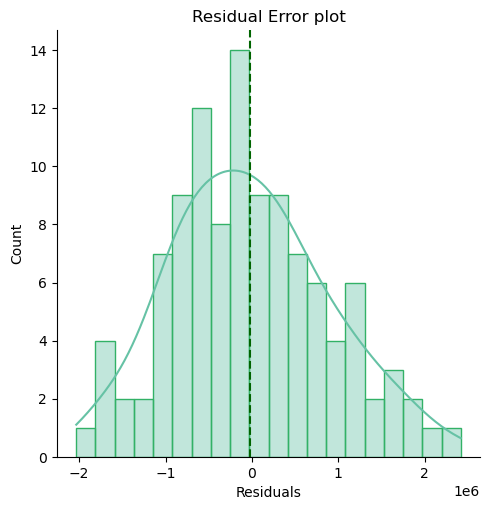

In [44]:
# Show the Residual normality & mean
res = (y_test - y_pred)
palette = sns.color_palette("husl", 8)
sns.displot((res), kde=True, bins = 20, edgecolor=palette[3],alpha=0.4)

# Add a vertical line which indicates the mean of residuals
plt.axvline((y_test - y_pred).mean(),color='#006400',linestyle='--')

# Labelling x-axis and y-axis
plt.title('Residual Error plot')                 
plt.xlabel('Residuals')    
plt.ylabel('Count')

# Show the residual error plot
plt.show()

**4c) Plot the Scatterplot of Residuals against the Predicted values**

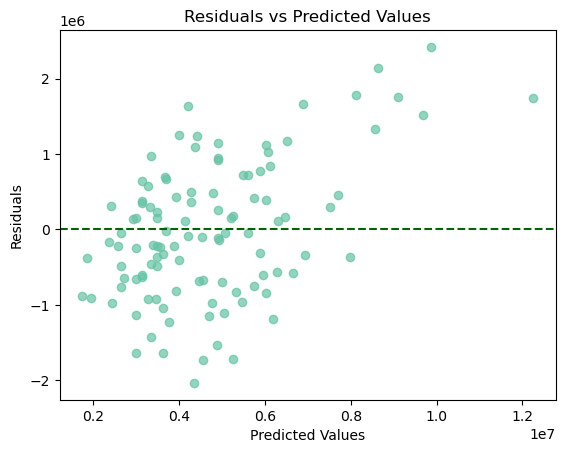

In [45]:
# Plotting the residuals against the predicted values
plt.scatter(y_test, res, alpha=0.7)

# Adding a horizontal line at y = 0
plt.axhline(y=0, color='#006400', linestyle='--')

# Labeling the axes and title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

# Showing the plot
plt.show()

**4d) Visualization of Predicted vs. Actual House Prices [y_pred vs y_test]**

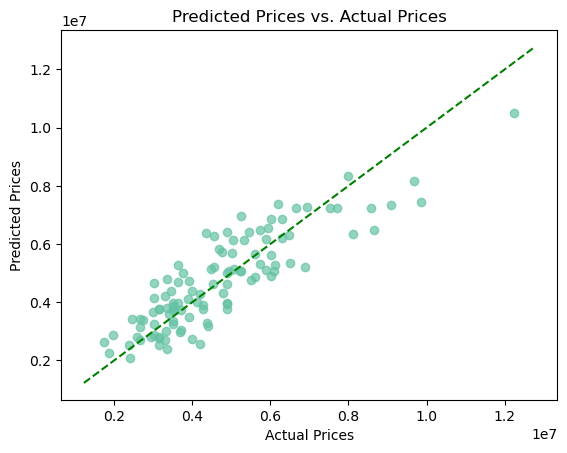

In [46]:
# Scatter plot of y_pred against y_test to understand the spread.
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, alpha=0.7)

# Add line y=x
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, 'g--', zorder=1)

# Labeling x-axis, y-axis and title
ax.set_xlabel('Actual Prices')
ax.set_ylabel('Predicted Prices')
ax.set_title('Predicted Prices vs. Actual Prices')

# Show scatter plot
plt.show()